In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
def model_fn (a_layer=None): 
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape= (28, 28)))
    model.add (keras.layers.Dense(100, activation='relu'))
    
    if a_layer: 
        model.add(a_layer)
    
    model.add (keras.layers.Dense(10, activation='softmax')) 

    return model

In [5]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') 
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


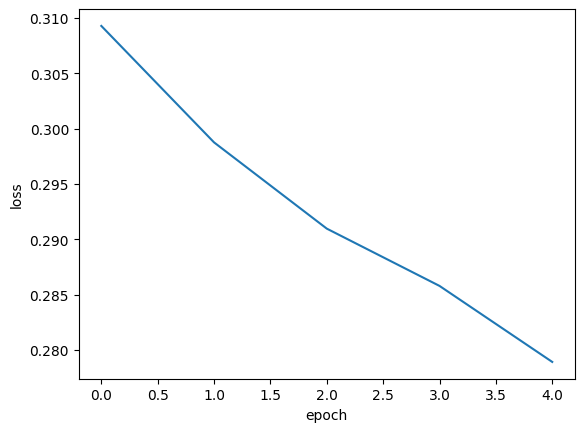

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) 
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.show()

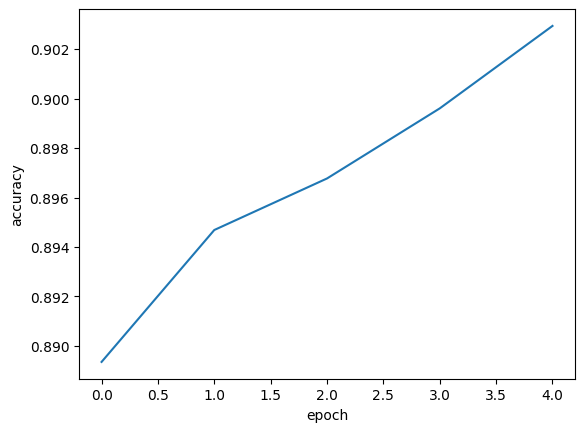

In [10]:
plt.plot(history .history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy') 
plt.show()

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') 
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


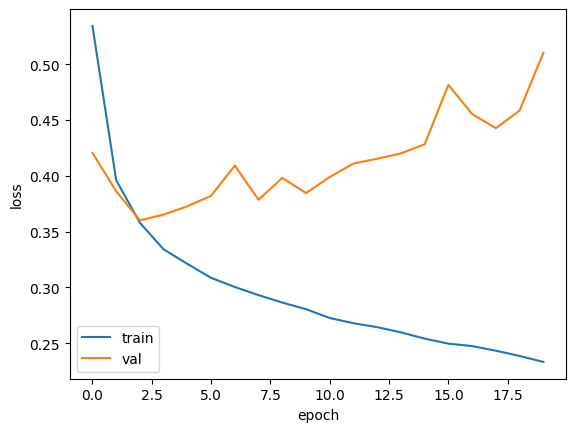

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.xlabel('epoch')
plt.ylabel('loss')
plt. legend (['train','val'])
plt.show()

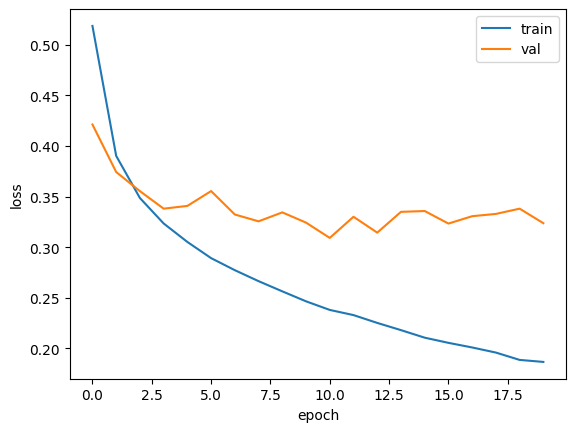

In [14]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot (history .history['val_loss']) 
plt.xlabel('epoch')
plt.ylabel('loss')
plt. legend(['train', 'val']) 
plt.show()

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile (optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target)) 

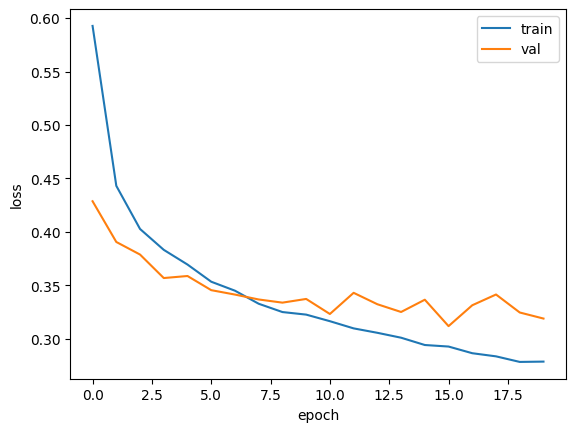

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val']) 
plt.show()

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [21]:
model.save_weights('model-weights.h5')

In [22]:
model.save('model-whole.h5')

In [23]:
model = model_fn(keras.layers.Dropout (0.3)) 
model.load_weights('model-weights.h5')

In [24]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) 
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 388us/step
0.8828333333333334


In [25]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 448us/step - loss: 0.3224 - accuracy: 0.8828


[0.32239940762519836, 0.8828333616256714]

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True) 
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [27]:
model = keras.models.load_model('best-model.h5') 
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 549us/step - loss: 0.3171 - accuracy: 0.8848


[0.3170759379863739, 0.8847500085830688]

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [30]:
print(early_stopping_cb.stopped_epoch)

7


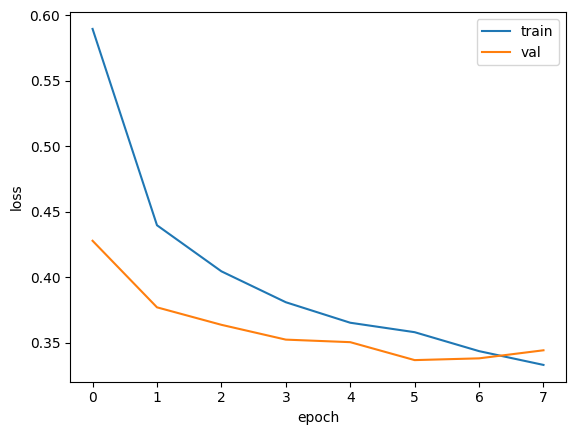

In [31]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.legend(['train', 'val']) 
plt.show()

In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 451us/step - loss: 0.3367 - accuracy: 0.8759


[0.3367104232311249, 0.8759166598320007]